In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

#Creates a grid style in background
style.use('ggplot')

%matplotlib inline


In [2]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo

from plotly.offline import init_notebook_mode,plot,iplot

# Cufflinks is another library that connects the Pandas data frame with Plotly enabling users to create visualizations directly from Pandas.
# The library binds the power of Plotly with the flexibility of Pandas for easy plotting.
import cufflinks as cf

# Enabling the offline mode for interactive plotting locally
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
pip install folium

In [4]:
# Folium makes it easy to visualize data that's been manipulated in Python on an interactive leaflet map.
import folium

In [5]:
# import xlsx file
# the prefix r is helpfull as we doesnt need to chnage the slash 
df = pd.read_excel(r"C:\Users\dani8003\Desktop\PYTHON\Covid Analysis\Covid cases in India.xlsx")

In [6]:
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0


In [7]:
# Dropping the S.No. column
# axis = 1 for columns and inplace=True to remove in original dataset
df.drop(['S. No.'],axis=1,inplace=True)

In [8]:
# Adding an extra column
df['Total Cases']=df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [9]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30


In [10]:
# total number of cases
total_cases_overall=df['Total Cases'].sum()
print('The total number of cases till now in India is :',total_cases_overall)

The total number of cases till now in India is : 729


In [11]:
# Active cases
df['Active Cases']=df['Total Cases']-(df['Cured']+df['Death'])

In [12]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19


In [13]:
# Highlights the maximum value of a column with darker shade
df.style.background_gradient(cmap="Reds")

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [14]:
# https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm
# Group by helps in Splitting the Object , Applying a function ,Combining the results
Total_Active_Cases = df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()

In [15]:
Total_Active_Cases

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [16]:
type(Total_Active_Cases)

pandas.core.frame.DataFrame

In [17]:
################## Graphical Representation #########################

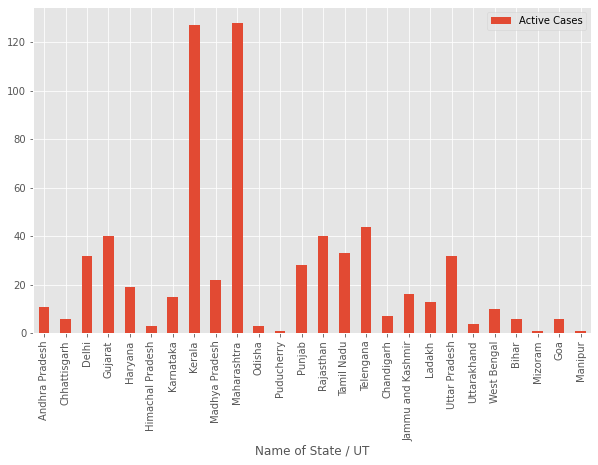

In [18]:
# Using pandas

df.plot(kind='bar',x='Name of State / UT',y='Active Cases',figsize=(10,6))

<BarContainer object of 26 artists>

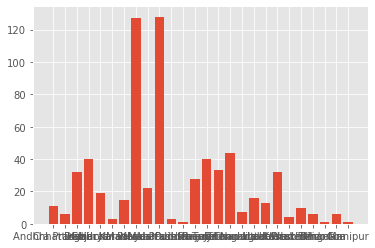

In [19]:
# Using Matplotlib
plt.bar(df['Name of State / UT'],df['Active Cases'])

In [20]:
# Using Plotly
df.iplot(kind='bar',x='Name of State / UT',y='Active Cases')

In [21]:
"""
Plotly Express is a high-level wrapper for Plotly, which essentially means it does a lot of the things that you can do it 
Plotly with a much simpler syntax. It is pretty easy to use, and doesn't require connecting your file to Plotly or specifying 
that you want to work with Plotly offline.
"""

# Using Plotly express
px.bar(df,x='Name of State / UT',y='Active Cases')

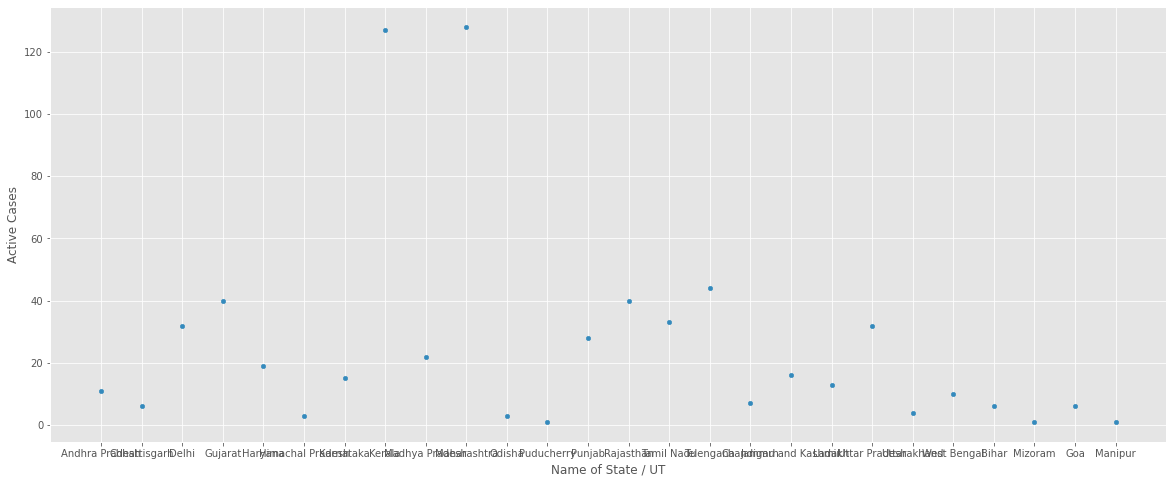

In [28]:
# Pandas scatter plot
df.plot(kind='scatter',x='Name of State / UT',y='Active Cases',figsize=(20,8))

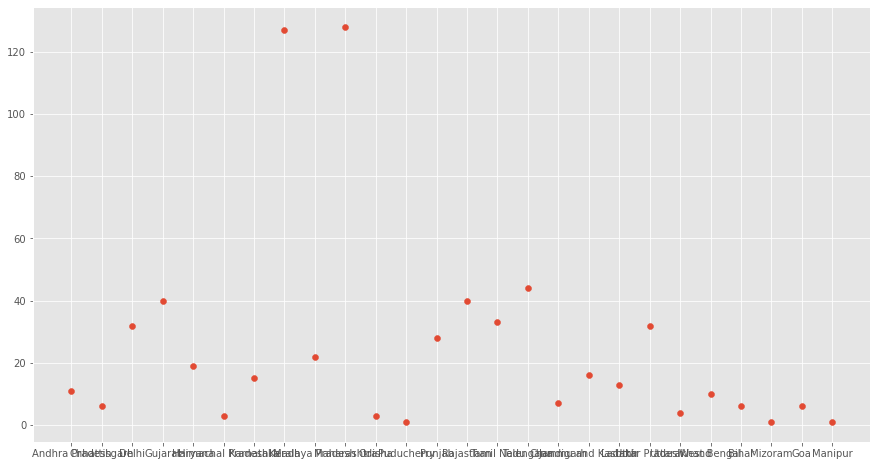

In [31]:
# Matplotlib scatter plot
plt.figure(figsize=(15,8))
plt.scatter(df['Name of State / UT'],df['Active Cases'])

In [34]:
# Ployly scatter plot
df.iplot(kind='scatter',x='Name of State / UT',y='Active Cases',mode='markers',title='Plotly Scatter Plot',xTitle='Name of State / UT',yTitle='Active Cases')

In [35]:
# Plotly Express scatter plot
px.scatter(df,x='Name of State / UT',y='Active Cases')

# Object Oriented Visualization

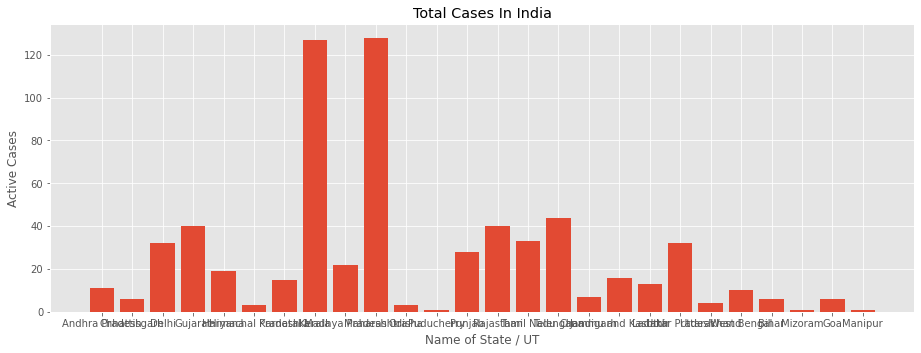

In [52]:
# Matplotlib

fig=plt.figure()
axes=fig.add_axes([0,0,2,1])
# axes=fig.add_axes([left,bottom,width,height])
axes.bar(df['Name of State / UT'],df['Active Cases'])
axes.set_title("Total Cases In India")
axes.set_xlabel('Name of State / UT')
axes.set_ylabel('Active Cases')

# To eliminate the wordings in top left as Text(0, 0.5, 'Active Cases')
plt.show()

In [60]:
# Plotly
# import plotly.graph_objects as go

fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Active Cases']))
fig.update_layout(title='Total Cases In India',xaxis=dict(title='Name of State / UT'),yaxis=dict(title='Active Cases'))

In [62]:
Indian_Cord=pd.read_excel(r"C:\Users\dani8003\Desktop\PYTHON\Covid Analysis\Indian Coordinates.xlsx")
Indian_Cord.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [63]:
df_full=pd.merge(Indian_Cord,df)

In [64]:
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33
